# TP1

In [79]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

## Ejercicio 1

In [80]:
MOD = 2**32.0
MULT = 1013904223
INC = 1664525

In [81]:
def gcl( seed, size=10, normalized=False ):
    results = []
    xn = seed
    for i in range(size):
        xn = (((MULT*xn) + INC) % MOD)
        results.append(xn)

    return results if not normalized else [ res/MOD for res in results ]

In [82]:
# (97980 + 98178 + 98070 + 100856) / 4 = 98771
numbers = gcl( 98771 )
for i,n in enumerate(numbers, 1):
    print("i={}: {}".format(i, n))

i=1: 2878200922.0
i=2: 412326400.0
i=3: 1712163840.0
i=4: 3808713216.0
i=5: 203738112.0
i=6: 392501760.0
i=7: 3528199168.0
i=8: 1639307776.0
i=9: 2357414912.0
i=10: 1844877824.0


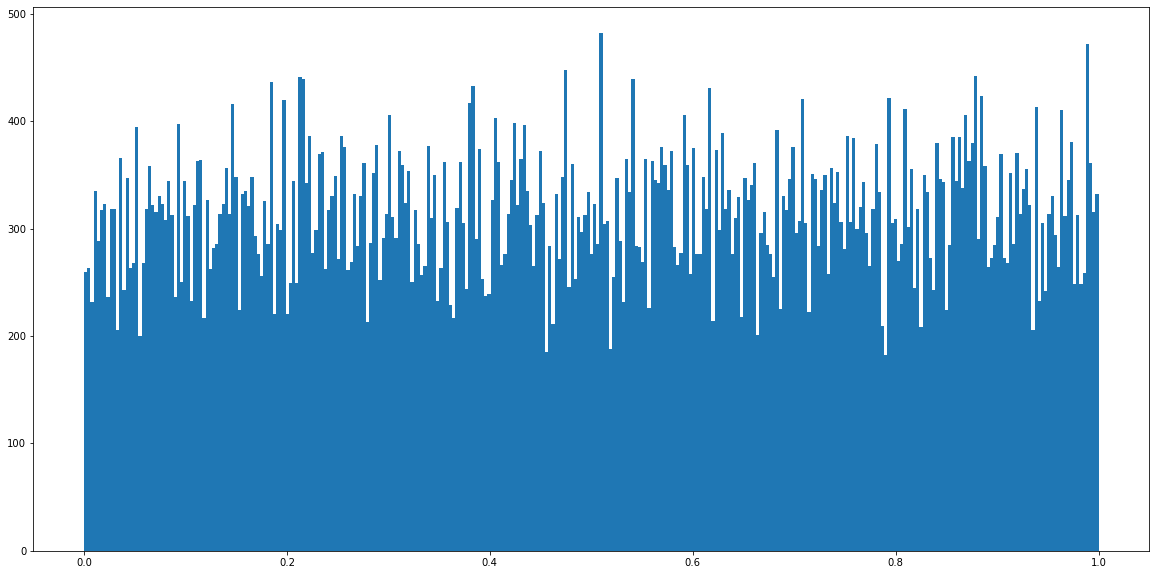

In [5]:
numbers = gcl( 98771, size=100000, normalized=True)
fig, ax = plt.subplots(figsize=(20,10))
ax.hist(numbers, bins=317)
plt.show()

## Ejercicio 2

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import expon

In [7]:
f = []

In [8]:
for t in range(10):
    f.append(1.0/25.0)

In [9]:
for t in range(10,100):
    f.append(3.0/5.0*expon.pdf(t,loc=10,scale=15))

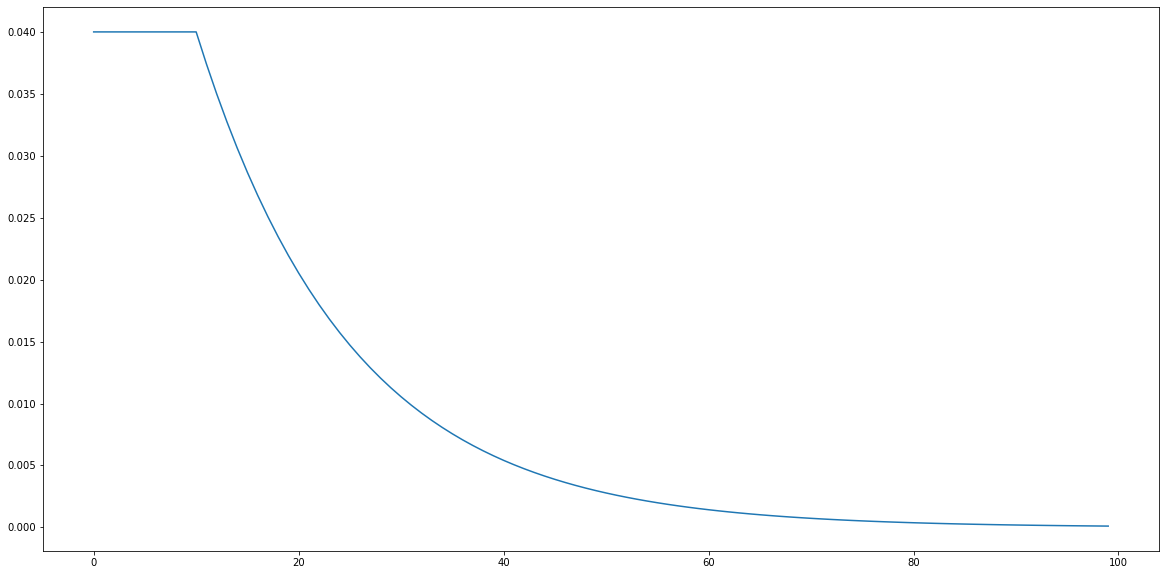

In [10]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(f)
plt.show()

In [11]:
F = []

In [12]:
for t in range(10):
    F.append(1.0/25.0*t)

In [13]:
last = F[len(F)-1]

In [14]:
for t in range(11,100):
    F.append(3.0/5.0*expon.cdf(t,loc=10,scale=15) + last)

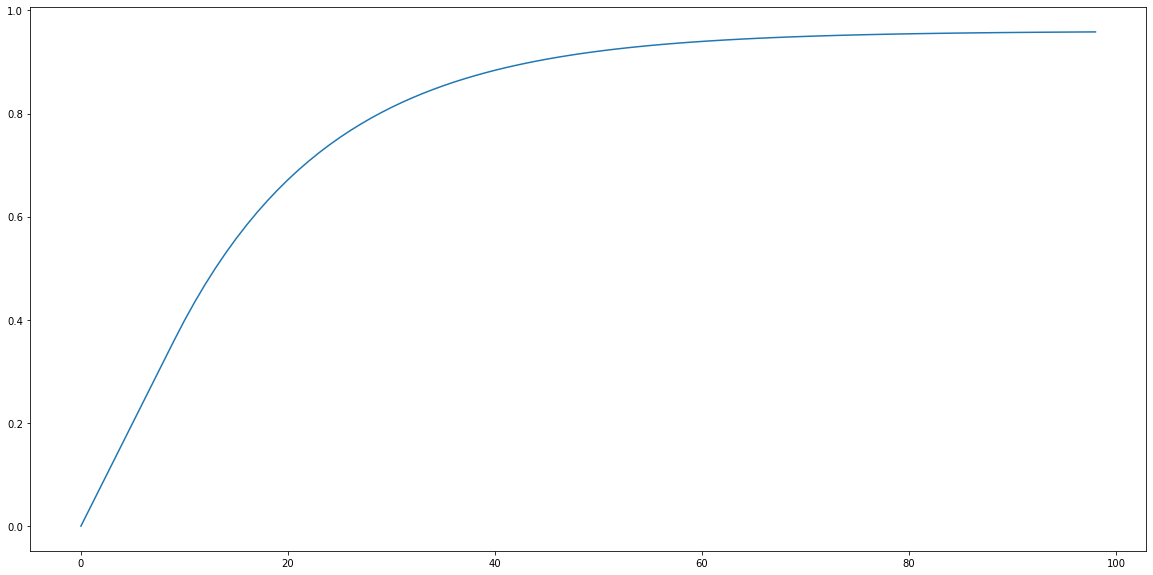

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(F)
plt.show()

## Ejercicio 3

In [16]:
def p(x):
    return st.norm.pdf( x, loc=15, scale=3 )

def q(x):
    return st.expon.pdf( x, scale=50 )

In [17]:
x = np.arange(0,40)
k = max( p(x) / q(x) )

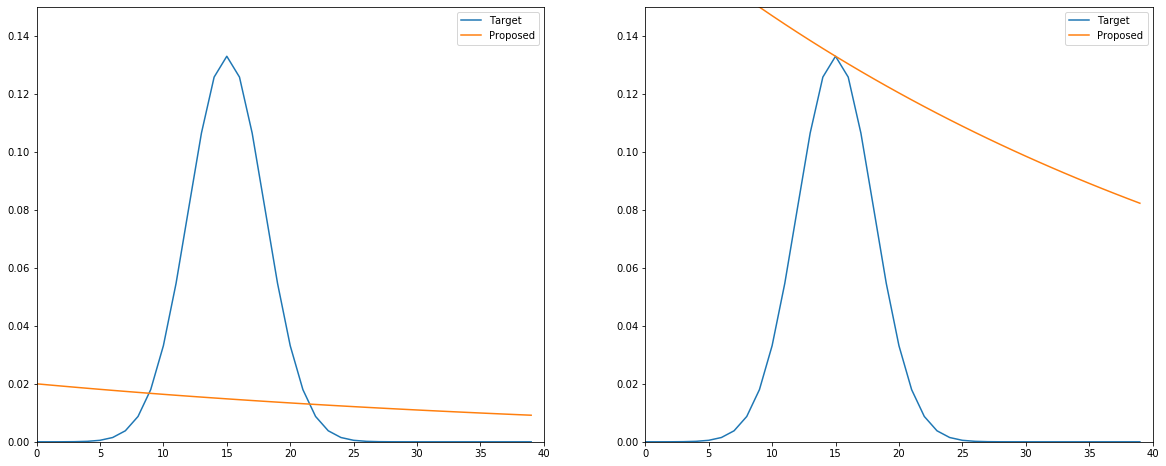

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.plot(x, p(x), label='Target')
ax1.plot(x, q(x), label='Proposed')
ax1.set_ylim((0,0.150)); ax1.set_xlim((0,40))
ax2.plot(x, p(x), label='Target')
ax2.plot(x, k*q(x), label='Proposed')
ax2.set_ylim((0,0.150)); ax2.set_xlim((0,40))
ax1.legend(); ax2.legend()

In [19]:
def accept_reject_method(iter = 100000):
    samples = []

    for i in range(iter):
        z = np.random.exponential(50)
        u = np.random.uniform(0, k*q(z))

        if u < p(z):
            samples.append(z)

    return np.array(samples)


In [20]:
s = accept_reject_method()

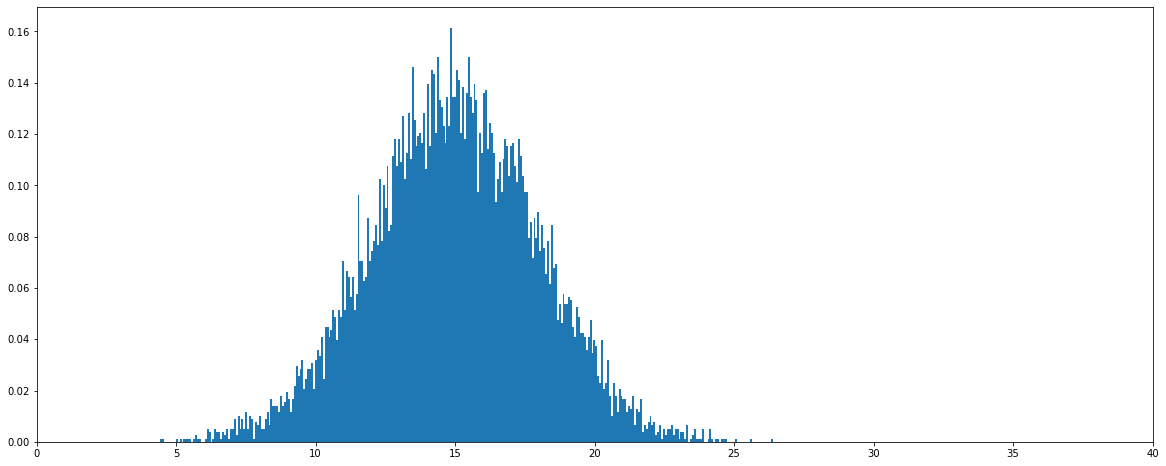

In [21]:
fig, ax = plt.subplots(figsize=(20,8))
ax.hist( s, bins=317, density=True )
ax.set_xlim((0,40))
plt.show()

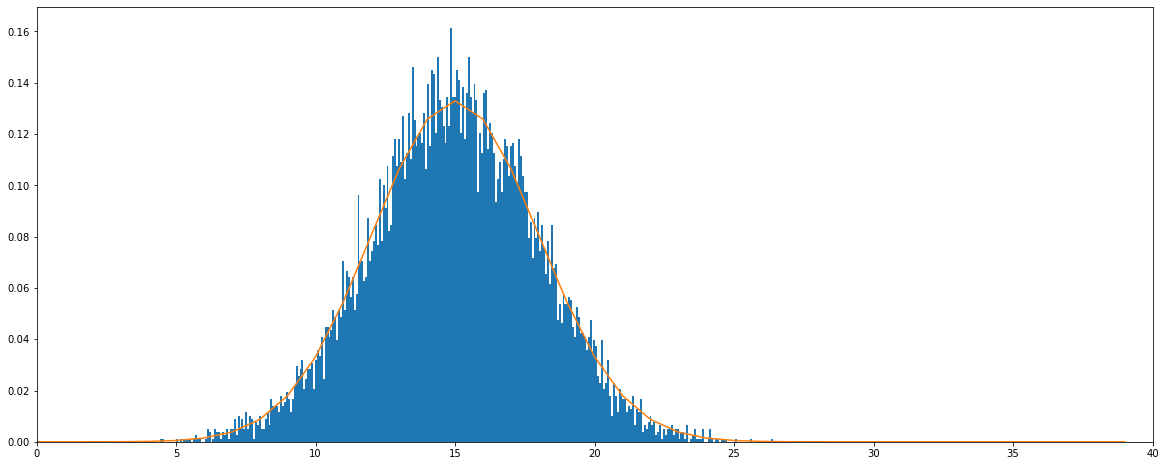

In [22]:
fig, ax = plt.subplots(figsize=(20,8))
ax.hist( s, bins=317, density=True )
ax.plot( x, p(x))
ax.set_xlim((0,40))
plt.show()

In [23]:
print("La media de la distribucion obtenida es: {} y la varianza: {}".format(s.mean(), s.var()))

La media de la distribucion obtenida es: 14.970175618449268 y la varianza: 8.845359428021682


In [24]:
print("Factor de rendimiento del metodo: {}".format( len(s)/100000))

Factor de rendimiento del metodo: 0.11256


## Ejercicio 4

In [25]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage.interpolation import rotate
import math

In [26]:
def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

In [27]:
points = 1000

In [28]:
xs = np.random.uniform(low=0, high=1, size=(points))*5 + 7.5
ys = np.random.uniform(low=0, high=1, size=(points))*5 + 7.5

In [29]:
l = []
for i in range(points):
    l.append(rotate((10,10),(xs[i],ys[i]),math.radians(45)))

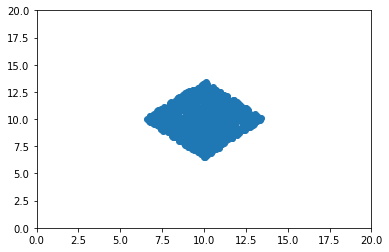

In [30]:
fig,ax = plt.subplots()
ax.scatter([x[0] for x in l],[x[1] for x in l])
ax.set_xlim((0,20))
ax.set_ylim((0,20))
plt.show()

## Ejercicio 5

In [31]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [32]:
def box_muller(u1,u2):
    z1 = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
    z2 = np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2)
    return z1,z2

In [33]:
us = np.random.uniform(0,1,(100000,2))

In [34]:
z1 = []
z2 = []
for u1, u2 in us:
    zs = box_muller(u1,u2)
    z1.append(zs[0])    
    z2.append(zs[1])

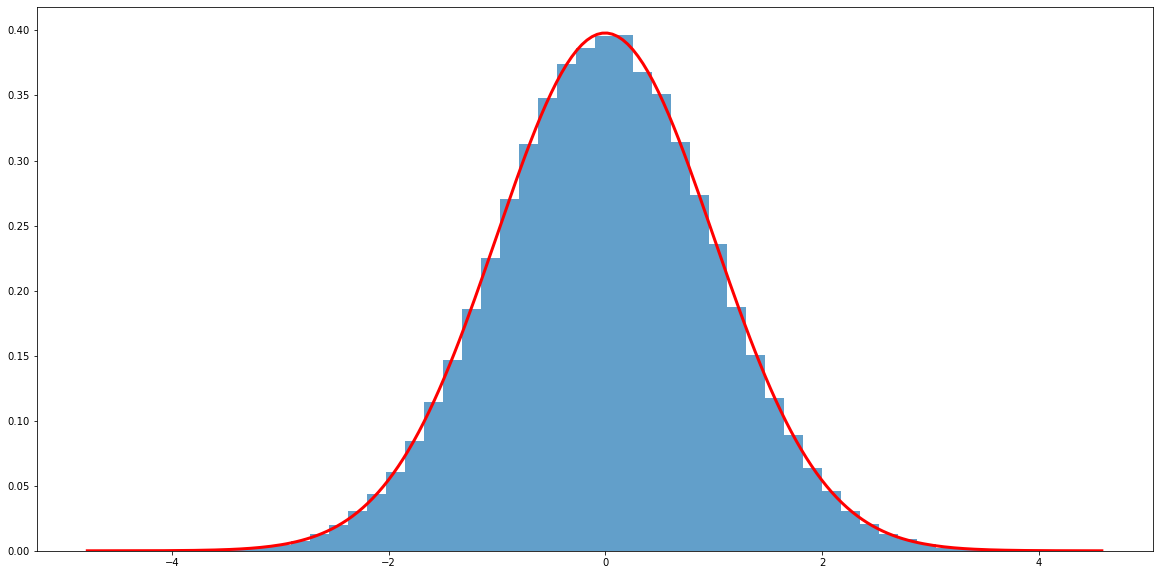

In [35]:
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(z1,fit=norm,kde=False,fit_kws={"color": "r", "lw": 3, "label": "normal"},hist_kws={"alpha": 0.7})
plt.show()

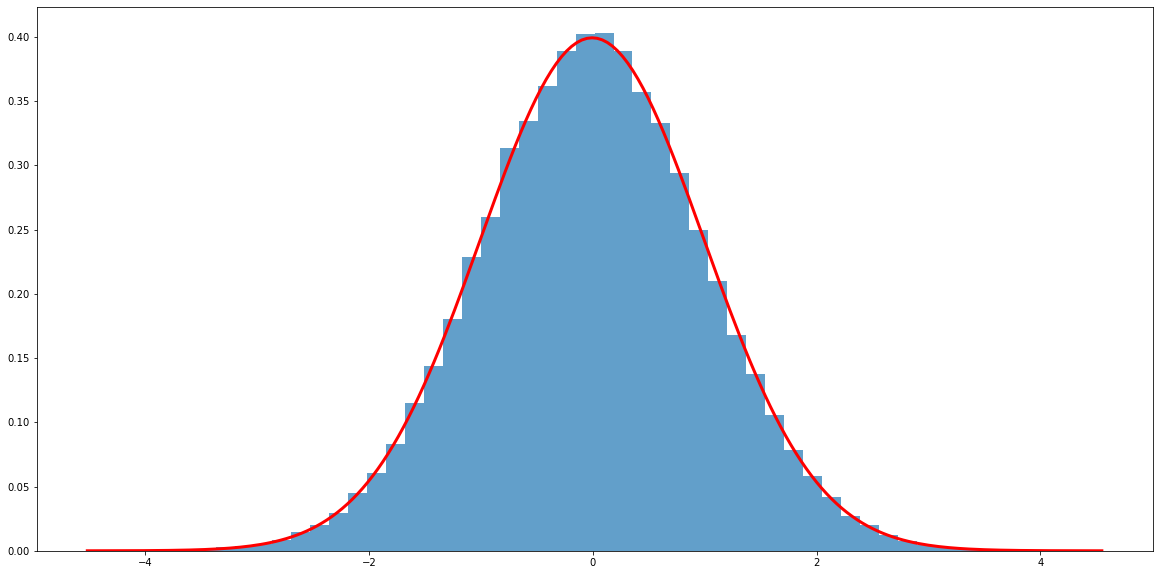

In [36]:
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(z2,fit=norm,kde=False,fit_kws={"color": "r", "lw": 3, "label": "normal"},hist_kws={"alpha": 0.7})
plt.show()

## Ejercicio 6

In [37]:
values=gcl(98771,size=100000,normalized=True)

In [38]:
categoria=[0,0,0,0]

for number in values:
    if number<0.1:
        categoria[0]+=1.0
    elif number>=0.1 and number<0.6:
        categoria[1]+=1.0
    elif number>=0.6 and number<0.9:
        categoria[2]+=1.0
    elif number>=0.9:
        categoria[3]+=1.0

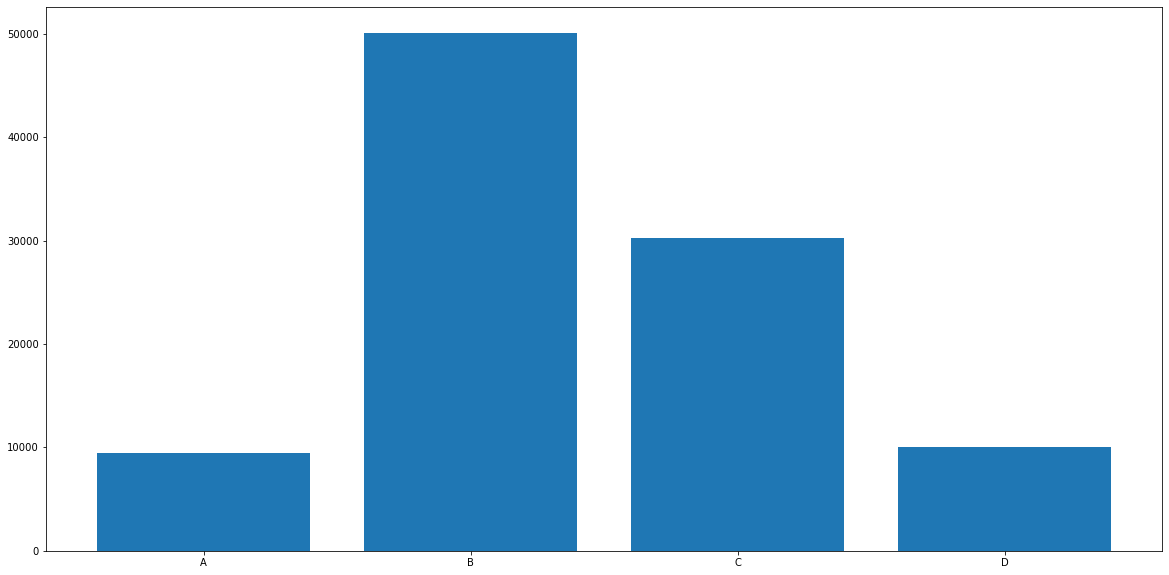

In [39]:
import matplotlib.pyplot as plt

data = {'A': categoria[0], 'B': categoria[1], 'C': categoria[2], 'D': categoria[3]}
names = list(data.keys())
values = list(data.values())


fig, ax = plt.subplots(figsize=(20,10))

plt.plot(figsize=(20, 10))
plt.bar(names, values)
plt.show()

## Ejercicio 7

In [40]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [41]:
def spectral_test_2d(lcg):
    '''
    Given a linear congruent generator lcg,
    obtain a 2D scatter plot where: for each
    point (x, y),
      - x = lcg(i)
      - y = lgc(i+1)
    '''
    
    # generate samples
    samples = 1000
    x = lcg(98771,   size=samples, normalized=True)
    y = lcg(98771+1, size=samples, normalized=True)
    
    # plot results
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title('Test espectral 2D del GCL')
    sns.scatterplot(x=x, y=y)
    plt.show()

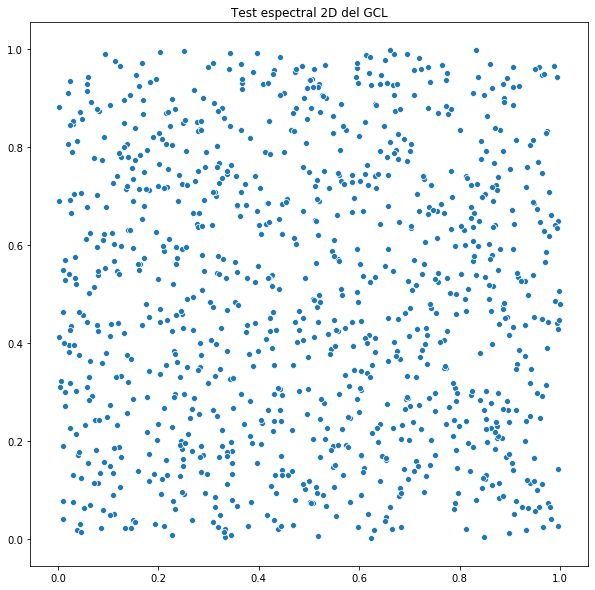

In [43]:
spectral_test_2d(gcl)

In [111]:
from mpl_toolkits import mplot3d

def spectral_test_3d(lcg):
    '''
    Given a linear congruent generator lcg,
    obtain a 3D scatter plot where: for each
    point (x, y, z),
      - x = lcg(i)
      - y = lgc(i+1)
      - z = lcg(i+2)
    '''
    
    fig = plt.figure(figsize=(20, 20))

    # generate samples
    samples = 1000
    x = lcg(98771,   size=samples, normalized=True)
    y = lcg(98771+1, size=samples, normalized=True)
    z = lcg(98771+2, size=samples, normalized=True)
    
    # plot results at 30, 40 and 60 degrees
    fignum = 1
    for angle in [30, 60]:
        for elev in [30, 60]:
            ax = fig.add_subplot(2, 2, fignum, projection='3d')
            ax.set_title('Rotacion: {} y {} grados'.format(angle, elev))
            ax.scatter(x, y, z)
            ax.set_xlabel('x')
            ax.set_ylabel('y')
            ax.set_zlabel('z')
            ax.view_init(elev=elev, azim=angle)
            fignum += 1

    plt.show()

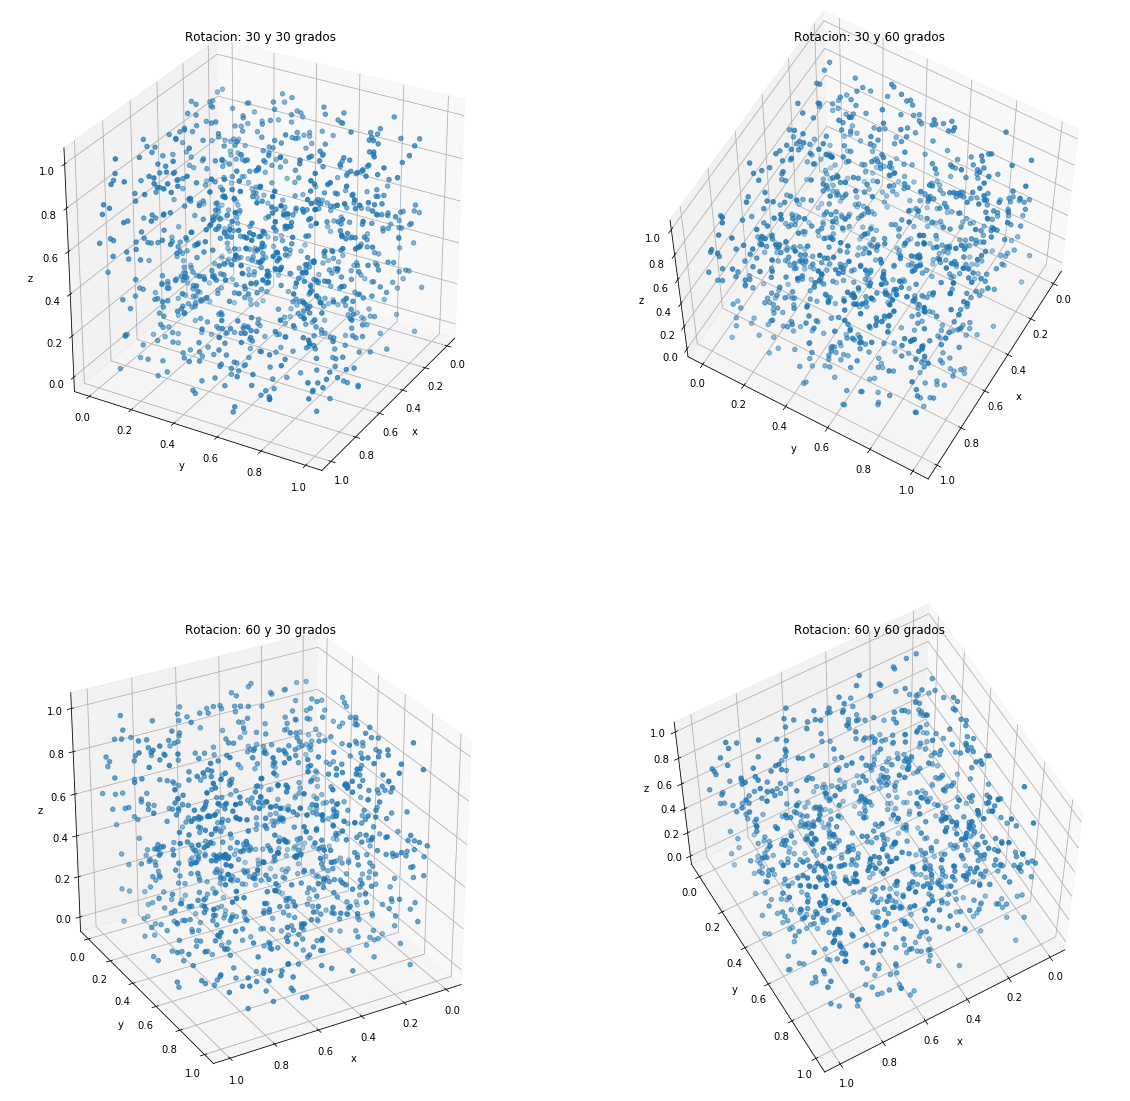

In [112]:
spectral_test_3d(gcl)

## Ejercicio 8

In [45]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [46]:
alpha = 0.3
beta = 0.6

# significance level
ns = 0.01

In [47]:
def gap_test(lcg, alpha, beta, ns, seed=98771):
    '''
    1. Generate random numbers in [0,1] with the given lcg
    2. Obtain frecuencies of every observed gap
    3. Compare the observed distribution with a Geometric distribution
    4. Return True if lcg passes the gap test, False otherwise
    '''
    
    samples = 1000
    
    l = lcg(seed, size=samples, normalized=True)
    gaps = {}
    gap_size = 0
    for u in l:
        if u < alpha or beta < u:
            gap_size += 1
        else:
            if gap_size not in gaps:
                gaps[gap_size] = 0
            gaps[gap_size] += 1
            gap_size = 0
    
    # fill not seen gaps with 0
    gs = [i for i in range(max(gaps))]
    for i in gs:
        if i not in gaps: 
            gaps[i] = 0
    
    # observed distribution
    observed = [gaps[g] for g in gs]
    
    # probability of success of the geometric distribution
    p_ab = beta - alpha
    # probability of sequence of length x of the geometric distribution
    p = lambda x : p_ab * (1 - p_ab) ** x
    
    # ammount of gaps observed/generated
    gap_samples = sum([gaps[i] for i in gaps])
    
    expected = [1+(gap_samples * p(g)) for g in gs]
    
    # show histograms
    fig = plt.figure(figsize=(20, 10))
    x1 = [i for i in range(len(observed)) for j in range(observed[i])]
    x2 = [i for i in range(len(expected)) for j in range(int(expected[i]))]
    plt.hist([x1,x2], bins=10, label=['Observed','Expected'], color=['red','blue'])
    plt.legend()
    plt.show()
    
    # compare distributions
    statistic, p_val = scipy.stats.chisquare(observed, f_exp=expected)
    
    if p_val < ns:
        return False
    return True

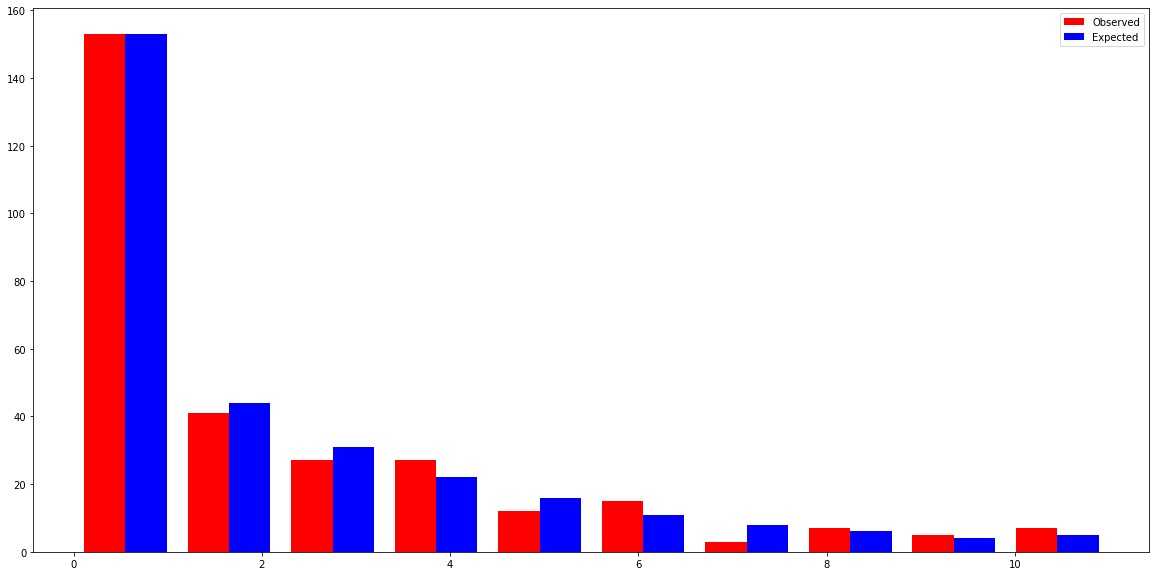

El gcl pasa el gap test


In [48]:
alpha = 0.3
beta = 0.6

# significance level
ns = 0.01

if gap_test(gcl, alpha, beta, ns):
    print('El gcl pasa el gap test')
else:
    print('El gcl no pasa el gap test')

## Ejercicio 9

In [49]:
categoria

[9512.0, 50100.0, 30309.0, 10079.0]

In [50]:
from scipy import stats as stats
import matplotlib.mlab as mlab

frecs = categoria
expected_values =  [0.1*100000,0.5*100000,0.3*100000,0.1*100000]


(s,p) = stats.chisquare(frecs,f_exp = expected_values)

print("s = " + str(s))
print("p = " + str(p))

if(p < 0.01):
    
    print("Acepto H0")
else:
    
    print("Rechazo H0")
    (s,p) = stats.chisquare(frecs,f_exp = expected_values, ddof = degrees_of_freedom)
    
    if(p < 0.05):
        print("Acepto H0")
    else:
        print("Rechazo H0")

s = 27.821199999999997
p = 3.959819579385525e-06
Acepto H0


## Ejercicio 10

In [51]:
def p(x):
    return st.norm.pdf( x, loc=15, scale=3 )

def q(x):
    return st.expon.pdf( x, scale=50 )

In [52]:
def accept_reject_method(iter = 100000):
    samples = []

    for i in range(iter):
        z = np.random.exponential(50)
        u = np.random.uniform(0, k*q(z))

        if u < p(z):
            samples.append(z)

    return np.array(samples)

In [53]:
normal_values=list(accept_reject_method(100000))

In [54]:
print(len(normal_values))

11166


In [55]:
def empirical_cdf(values, x):
    values.sort()
    n = len(values)
    
    for i in range(n):
        if( i == 0 and x < values[i+1] ):
            return 0.0
        elif( i >= n and x >= values[i] ):
            return 1.0
        elif( x >= values[i] and x < values[i+1] ):
            return float(float(i)/float(n))
        
N = len(normal_values)
normal_values.sort()

empirical_normal_values = [ float(empirical_cdf(normal_values, normal_values[i])) for i in range(N-1) ]
theoretical_normal_values = [ float(norm.cdf(normal_values[i])) for i in range(N-1) ]

d_plus = [ float(empirical_normal_values[i] - theoretical_normal_values[i])  for i in range(N-1) ]
d_minus = [ float(theoretical_normal_values[i] - empirical_normal_values[i])  for i in range(N-1) ]

d = max(d_plus) if max(d_plus) > max(d_minus) else max(d_minus)
d

0.9999946504558138

In [56]:
theoretical_normal_values

[0.9999946504558138,
 0.9999995176980704,
 0.999999978635175,
 0.999999990766664,
 0.9999999957181239,
 0.9999999974988947,
 0.9999999980576286,
 0.9999999980768863,
 0.9999999988489593,
 0.9999999990090815,
 0.9999999994566378,
 0.9999999994725386,
 0.9999999998865756,
 0.9999999999102962,
 0.9999999999569757,
 0.9999999999660965,
 0.9999999999663742,
 0.9999999999749556,
 0.9999999999776042,
 0.999999999978555,
 0.9999999999805456,
 0.9999999999816996,
 0.9999999999874354,
 0.9999999999875292,
 0.999999999990951,
 0.9999999999919686,
 0.9999999999946391,
 0.9999999999953721,
 0.9999999999958537,
 0.9999999999964303,
 0.9999999999967479,
 0.9999999999976177,
 0.9999999999977894,
 0.9999999999977927,
 0.9999999999978415,
 0.9999999999979391,
 0.99999999999802,
 0.999999999998546,
 0.9999999999985488,
 0.9999999999986425,
 0.999999999998688,
 0.9999999999988627,
 0.9999999999988664,
 0.9999999999988745,
 0.999999999999379,
 0.9999999999995247,
 0.9999999999995974,
 0.9999999999996475,
 

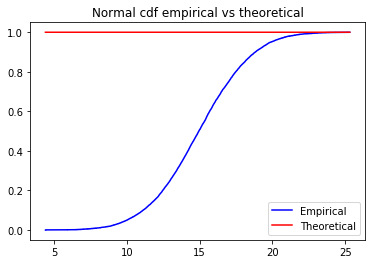

In [57]:
fig, ax = plt.subplots()

ax.step(normal_values[:-1], empirical_normal_values, 'b', label='Empirical') 
ax.plot(normal_values[:-1], theoretical_normal_values, 'r', label='Theoretical') 

ax.set_title("Normal cdf empirical vs theoretical")
leg = ax.legend();

plt.show()